# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [109]:
import numpy as np
import pandas as pd

stud_set = pd.read_csv('students-data.csv',sep=';')
stud_set.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [110]:
stud_set.index.name='number'
stud_set.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [111]:
stud_set.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395,NaN,NaN,NaN,16.6962,1.27604,15,16,17,18,22
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395,NaN,NaN,NaN,2.74937,1.09474,0,2,3,4,4
Fedu,395,NaN,NaN,NaN,2.52152,1.0882,0,2,2,3,4
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# we can observe that there are no NaN values, thus no rows are removed
stud_set.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [113]:
stud_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [114]:
#Shows the variables that are not-numerical
stud_set.select_dtypes(include='object').head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [115]:
stu_int=stud_set.select_dtypes(exclude='object')
for columns in stu_int.columns:
    if stu_int[columns].var()<1:
        stud_set.drop(columns,axis=1,inplace=True)
        
stud_set.var()

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

In [116]:
stud_set.shape

(395, 27)

In [117]:
print('Variables with lesser than 1.0 variance are dropped')

Variables with lesser than 1.0 variance are dropped


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [118]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Categorical boolean mask
categorical_feature_mask = stud_set.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = stud_set.columns[categorical_feature_mask].tolist()


# apply le on categorical feature columns
stud_set[categorical_cols] = stud_set[categorical_cols].apply(lambda col: le.fit_transform(col))
stud_set[categorical_cols].head(10)


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
5,0,1,1,1,1,3,2,3,1,0,1,1,1,1,1,1,0
6,0,1,1,1,1,2,2,1,1,0,0,0,0,1,1,1,0
7,0,0,1,0,0,2,4,1,1,1,1,0,0,1,1,0,0
8,0,1,1,1,0,3,2,1,1,0,1,1,0,1,1,1,0


# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [119]:
stud_set['G1']=stud_set['G1'].map(lambda x: 1 if x>=10 else 0)
stud_set['G2']=stud_set['G2'].map(lambda x: 1 if x>=10 else 0)
stud_set['G3']=stud_set['G3'].map(lambda x: 1 if x>=10 else 0)
stud_set.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [136]:
stu_col = stud_set
X = pd.DataFrame()
Y=pd.DataFrame()
for columns in stu_col.columns:
    if (columns!= 'G3'):
        X[columns]=stu_col[columns]
    else:
        Y[columns]=stu_col[columns]
    
print(X.head())
print(Y.head())

        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   
3            0    0   15        1        0        1     4     2     1     3   
4            0    0   16        1        0        1     3     3     2     2   

        ...  nursery  higher  internet  romantic  goout  Walc  health  \
number  ...                                                             
0       ...        1       1         0         0      4     1       3   
1       ...        0       1         1         0      3     1       3   
2       ...        1       1         1         0      2     3       3   
3       ...        1       1         1         1      2     1       5   
4       

# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [139]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=300,random_state=10)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [154]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [155]:
print('Score:',clf.score(X_train, Y_train))

Score: 0.9266666666666666


# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [156]:
print('Intercept:',clf.intercept_)

Intercept: [0.31577351]


# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [204]:
m=clf.coef_
pd.DataFrame(m,columns=X_train.columns).T

,0
school,0.096396
sex,-0.008057
age,-0.163503
address,-0.135106
famsize,-0.120207
Pstatus,-0.458031
Medu,0.055849
Fedu,-0.132125
Mjob,-0.082376
Fjob,0.247653


In [205]:
print('We can observe that G2 has the coef of 3.845, thus G2 variable has the highest impact in the model')

We can observe that G2 has the coef of 3.845, thus G2 variable has the highest impact in the model


# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [187]:
clf.predict(X_train)

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], d

In [207]:
print('The score for the T_train dataset is:', clf.score(X_train,Y_train))

The score for the T_train dataset is: 0.9266666666666666


In [184]:
clf.predict(X_test)

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [208]:
print('Score for the test dataset is:',clf.score(X_test,Y_test))

Score for the test dataset is: 0.8736842105263158


# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [364]:
digi_dataset=pd.read_csv('bc2.csv')
digi_dataset.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [365]:
print('Thre are 699 records and the datatypes are listed below:\n')
digi_dataset.info()

Thre are 699 records and the datatypes are listed below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [366]:
print('We can Observe that Bare Nuclei valriable is missing and there are no null values in Bare Nuclei valriable')
digi_dataset.describe(include='all').T #Bare Nuclei valriable is missing

We can Observe that Bare Nuclei valriable is missing and there are no null values in Bare Nuclei valriable


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


### Check Missing Values

In [367]:
print('we can see that there are no missing/Nan/null values in the dataset')
digi_dataset.isna().sum()

we can see that there are no missing/Nan/null values in the dataset


ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [368]:
digi_dataset['Bare Nuclei']=digi_dataset['Bare Nuclei'].map(lambda x: x if  x!="?" else 1 )
digi_dataset.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


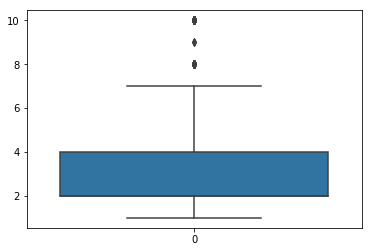

In [369]:
import seaborn as sns
sns.boxplot(data=digi_dataset['Single Epithelial Cell Size'])

In [370]:
print('We can observe that there are less outliers and desicion tree can handle outliers, i am not treating /removing the outliers')

We can observe that there are less outliers and desicion tree can handle outliers, i am not treating /removing the outliers


### Print and plot the distribution of target variable (Class - using Histogram) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002011DBB26D8>]],
      dtype=object)

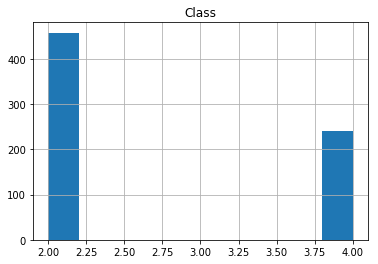

In [371]:
import matplotlib.pyplot as mt
digi_dataset.hist(column='Class')

### convert the datatype of Bare Nuclei to `int`

In [372]:
digi_dataset['Bare Nuclei']= digi_dataset['Bare Nuclei'].astype('int64')
digi_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


### Standardization of Data (Use Standard Scaler)

In [420]:
from sklearn.preprocessing import StandardScaler
x=digi_dataset.drop(columns=['Class','ID'])
y=digi_dataset['Class'].astype('str')
scaler = StandardScaler()
scaled_value = scaler.fit_transform(x)
df_scaler=pd.DataFrame(scaled_value,columns=['ClumpThickness','CellSize','CellShape','MarginalAdhesion','SingleEpithelialCellSize','BareNuclei','NormalNucleoli','BlandChromatin','Mitoses'])
df_scaler.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912


### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002011D9BE898>,
      dtype=object)

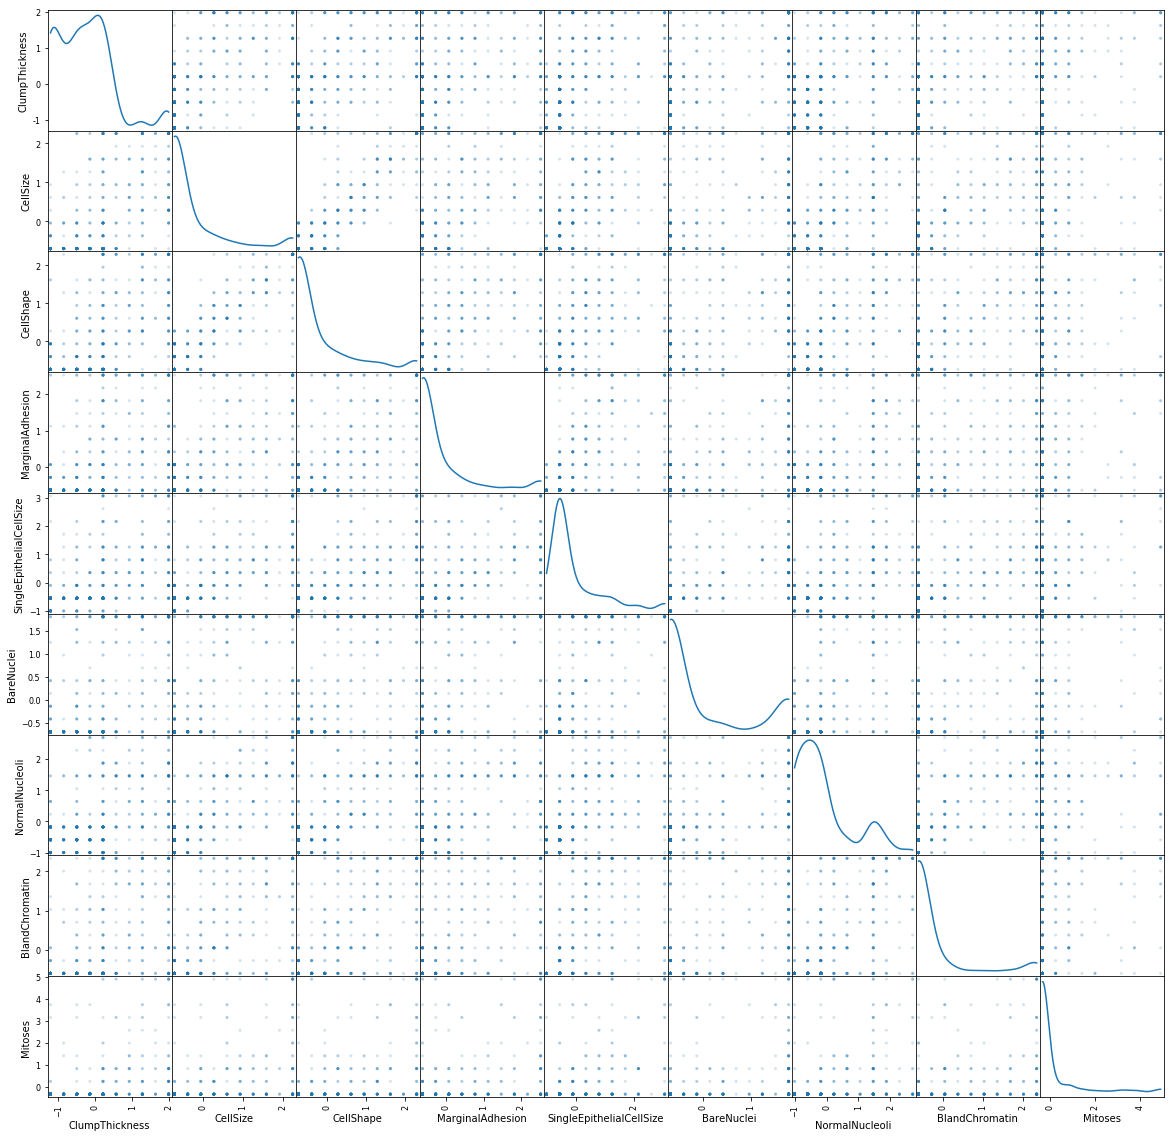

In [421]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_scaler, alpha=0.2,diagonal='kde',figsize=(20, 20))

In [422]:
df_scaler.corr()

,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034
CellSize,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693
CellShape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911
MarginalAdhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633
SingleEpithelialCellSize,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101
BareNuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397
NormalNucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169
BlandChromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000


In [423]:
print('We can observe that CellSize and CellShape is highly colinear, so dropping CellShape ') 
X=df_scaler.drop(columns='CellShape')

We can observe that CellSize and CellShape is highly colinear, so dropping CellShape 


### Divide the dataset into feature set and target set

### Divide the Training and Test sets in 70:30 

In [424]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,y,train_size=.70,random_state=10)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Model 1 : Implement a default Decision Tree model with no attributes

In [425]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier()
regressor.fit(X_train,Y_train)
regressor.score(X_train,Y_train)

1.0

### Check the feature importances of the Decision Tree model

In [426]:
featur_imp = regressor.feature_importances_
featur_imp

array([0.02399446, 0.77124625, 0.01059405, 0.01631483, 0.12033135,
       0.00474613, 0.05277292, 0.        ])

In [427]:
pd.DataFrame(featur_imp,index=X_train.columns,columns=['IMP'])

,IMP
ClumpThickness,0.023994
CellSize,0.771246
MarginalAdhesion,0.010594
SingleEpithelialCellSize,0.016315
BareNuclei,0.120331
NormalNucleoli,0.004746
BlandChromatin,0.052773
Mitoses,0.000000


### Check the training & test accuracy of model 1 

In [428]:
regressor.predict(X_train)

array(['4', '2', '4', '4', '4', '2', '2', '2', '2', '4', '2', '2', '2',
       '2', '2', '4', '2', '4', '2', '4', '4', '4', '2', '2', '2', '2',
       '2', '2', '4', '2', '2', '2', '2', '2', '2', '4', '4', '2', '2',
       '2', '4', '2', '4', '2', '2', '2', '2', '4', '2', '2', '2', '2',
       '4', '2', '2', '4', '4', '4', '2', '2', '4', '4', '4', '2', '4',
       '4', '4', '2', '2', '2', '2', '4', '4', '4', '2', '4', '4', '2',
       '2', '2', '2', '2', '2', '4', '4', '2', '4', '4', '4', '2', '2',
       '4', '2', '2', '2', '2', '2', '2', '2', '2', '4', '4', '4', '2',
       '2', '4', '4', '4', '4', '4', '2', '2', '2', '4', '4', '4', '2',
       '4', '2', '4', '2', '4', '2', '4', '2', '2', '2', '2', '2', '2',
       '4', '4', '2', '2', '4', '4', '2', '4', '2', '4', '2', '2', '2',
       '4', '4', '2', '4', '2', '4', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '4', '4', '4', '2', '4', '4', '2', '4', '4', '2', '2',
       '4', '2', '4', '4', '4', '4', '2', '2', '2', '2', '2', '4

In [429]:
regressor.predict(X_test)

array(['4', '2', '2', '2', '2', '4', '2', '2', '4', '2', '4', '2', '2',
       '2', '2', '2', '2', '2', '4', '4', '4', '4', '4', '2', '2', '2',
       '4', '4', '2', '2', '2', '2', '4', '4', '2', '4', '4', '2', '2',
       '4', '2', '2', '2', '2', '4', '4', '2', '4', '2', '4', '2', '2',
       '2', '2', '2', '2', '4', '2', '2', '4', '2', '2', '2', '2', '4',
       '4', '2', '2', '2', '2', '2', '2', '2', '2', '2', '4', '4', '4',
       '2', '4', '2', '2', '2', '2', '2', '2', '2', '2', '4', '2', '4',
       '2', '4', '2', '2', '2', '4', '2', '2', '2', '2', '2', '2', '2',
       '2', '4', '2', '2', '2', '2', '2', '2', '4', '2', '4', '4', '2',
       '2', '4', '2', '2', '2', '2', '4', '2', '2', '2', '4', '4', '4',
       '4', '2', '2', '2', '4', '2', '4', '2', '2', '2', '2', '2', '2',
       '4', '2', '2', '2', '2', '2', '4', '4', '4', '2', '4', '2', '2',
       '2', '2', '2', '2', '4', '2', '2', '2', '2', '2', '2', '4', '2',
       '4', '2', '4', '2', '4', '2', '4', '2', '4', '2', '4', '2

In [430]:
print('Score for Train dataset:',regressor.score(X_train,Y_train))
print('Score for Test dataset:',regressor.score(X_test,Y_test))

Score for Train dataset: 1.0
Score for Test dataset: 0.9523809523809523


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [435]:
regressor1 = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=5)
regressor1.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [436]:
print('Score for Train dataset:',regressor1.score(X_train,Y_train))
print('Score for Test dataset:',regressor1.score(X_test,Y_test))

Score for Train dataset: 0.967280163599182
Score for Test dataset: 0.9428571428571428


### Print the confusion matrix of model 1 and model 2

In [437]:
Y_pred_model1 = regressor.predict(X_test)
Y_pred_model2= regressor1.predict(X_test)
from sklearn.metrics import confusion_matrix
print('Confusion matrix for Model1 dataset is:\n',confusion_matrix(Y_test,Y_pred_model1))
print('Confusion matrix for Model2 dataset is:\n',confusion_matrix(Y_test,Y_pred_model2))

Confusion matrix for Model1 dataset is:
 [[139   5]
 [  5  61]]
Confusion matrix for Model2 dataset is:
 [[138   6]
 [  6  60]]
